# Análisis Exploratorio de Datos de Empleo y Desempleo del DANE (2022-2025)

Este notebook realiza un análisis exploratorio de los datos de empleo y desempleo del DANE en Colombia durante los años 2022-2025. El objetivo es explorar las tendencias y patrones en las variables relacionadas con el mercado laboral a lo largo del tiempo.

## 1. Importar Bibliotecas Necesarias

En esta sección, importamos las bibliotecas que usaremos para el análisis y la visualización de los datos.

In [3]:
# Bibliotecas para manipulación de datos
import pandas as pd
import numpy as np
import glob
import os
from datetime import datetime

# Bibliotecas para visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configuraciones de visualización
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(style="whitegrid")
%matplotlib inline

# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## 2. Cargar Archivos Excel del DANE

En esta sección, vamos a cargar todos los archivos Excel que se encuentran en la carpeta `DANE_Empleo-Desempleo` y crear un DataFrame consolidado para el análisis.

In [4]:
# Definir la ruta a la carpeta de datos
data_path = '../data/DANE_Empleo-Desempleo/'

# Obtener la lista de archivos Excel
excel_files = glob.glob(os.path.join(data_path, '*.xlsx'))

# Mostrar los archivos disponibles
print(f"Se encontraron {len(excel_files)} archivos Excel:")
for file in excel_files:
    print(f" - {os.path.basename(file)}")

Se encontraron 44 archivos Excel:
 - Marzo2023.xlsx
 - Enero2024.xlsx
 - Septiembre2023.xlsx
 - Febrero2025.xlsx
 - Abril2024.xlsx
 - Diciembre2024.xlsx
 - Agosto2025.xlsx
 - Mayo2025.xlsx
 - Junio2022.xlsx
 - Abril2023.xlsx
 - Mayo2023.xlsx
 - Marzo2025.xlsx
 - Mayo2024.xlsx
 - Junio2023.xlsx
 - Julio2022.xlsx
 - Marzo2024.xlsx
 - Julio2025.xlsx
 - Febrero2022.xlsx
 - Febrero2023.xlsx
 - Abril2022.xlsx
 - Julio2024.xlsx
 - Diciembre2023.xlsx
 - Abril2025.xlsx
 - Junio2025.xlsx
 - Octubre2023.xlsx
 - Diciembre2022.xlsx
 - Noviembre2024.xlsx
 - Agosto2023.xlsx
 - Junio2024.xlsx
 - Julio2023.xlsx
 - Agosto2022.xlsx
 - Febrero2024.xlsx
 - Septiembre2024.xlsx
 - Enero2025.xlsx
 - Noviembre2023.xlsx
 - Octubre2022.xlsx
 - Mayo2022.xlsx
 - Septiembre2022.xlsx
 - Octubre2024.xlsx
 - Enero2023.xlsx
 - Marzo2022.xlsx
 - Agosto2024.xlsx
 - Noviembre2022.xlsx
 - Enero2022.xlsx


In [5]:
# Crear una función para extraer fecha del nombre del archivo
def extract_date_from_filename(filename):
    # Obtener solo el nombre del archivo sin la ruta
    basename = os.path.basename(filename)
    # Extraer el mes y año del nombre del archivo
    month_year = basename.replace('.xlsx', '')
    
    # Diccionario para convertir nombres de meses en español a números
    months_dict = {
        'Enero': '01', 'Febrero': '02', 'Marzo': '03', 'Abril': '04', 
        'Mayo': '05', 'Junio': '06', 'Julio': '07', 'Agosto': '08',
        'Septiembre': '09', 'Octubre': '10', 'Noviembre': '11', 'Diciembre': '12'
    }
    
    # Separar el mes y el año
    for month_name in months_dict.keys():
        if month_name in month_year:
            month = months_dict[month_name]
            year = month_year.replace(month_name, '')
            # Crear un objeto datetime (usamos el día 1 como convención)
            date_obj = datetime(int(year), int(month), 1)
            return date_obj
    
    return None

In [7]:
# Leer todos los archivos Excel y consolidarlos en un DataFrame
all_data = []

for file in excel_files:
    try:
        # Leer el archivo Excel
        df = pd.read_excel(file)
        
        # Extraer la fecha del nombre del archivo
        date = extract_date_from_filename(file)
        
        # Añadir la fecha como una columna al DataFrame
        if date is not None:
            df['fecha'] = date
            df['mes'] = date.month
            df['año'] = date.year
            
        # Añadir el nombre del archivo como referencia
        df['archivo_fuente'] = os.path.basename(file)
        
        # Agregar el DataFrame a la lista
        all_data.append(df)
        print(f"Archivo {os.path.basename(file)} cargado con éxito. Shape: {df.shape}")
    except Exception as e:
        print(f"Error al cargar {os.path.basename(file)}: {str(e)}")

# Verificar si tenemos datos para combinar
if all_data:
    # Intentar combinar los DataFrames
    try:
        # Combinar todos los DataFrames en uno solo
        consolidated_data = pd.concat(all_data, ignore_index=True)
        print(f"\nDatos consolidados. Shape final: {consolidated_data.shape}")
    except Exception as e:
        print(f"Error al consolidar los datos: {str(e)}")
        # Si hay error en la consolidación, podemos intentar un enfoque alternativo
        print("Intentando un enfoque alternativo para consolidar los datos...")
else:
    print("No se pudieron cargar datos de los archivos Excel.")

Archivo Marzo2023.xlsx cargado con éxito. Shape: (81, 7)
Archivo Enero2024.xlsx cargado con éxito. Shape: (81, 7)
Archivo Septiembre2023.xlsx cargado con éxito. Shape: (81, 7)
Archivo Febrero2025.xlsx cargado con éxito. Shape: (95, 7)
Archivo Abril2024.xlsx cargado con éxito. Shape: (81, 7)
Archivo Diciembre2024.xlsx cargado con éxito. Shape: (87, 7)
Archivo Agosto2025.xlsx cargado con éxito. Shape: (95, 7)
Archivo Mayo2025.xlsx cargado con éxito. Shape: (95, 7)
Archivo Junio2022.xlsx cargado con éxito. Shape: (77, 7)
Archivo Abril2023.xlsx cargado con éxito. Shape: (81, 7)
Archivo Mayo2023.xlsx cargado con éxito. Shape: (81, 7)
Archivo Marzo2025.xlsx cargado con éxito. Shape: (95, 7)
Archivo Mayo2024.xlsx cargado con éxito. Shape: (81, 7)
Archivo Junio2023.xlsx cargado con éxito. Shape: (81, 7)
Archivo Julio2022.xlsx cargado con éxito. Shape: (77, 7)
Archivo Marzo2024.xlsx cargado con éxito. Shape: (81, 7)
Archivo Julio2025.xlsx cargado con éxito. Shape: (95, 7)
Archivo Febrero2022.xl

## 3. Exploración Inicial de Datos

Realizamos un análisis inicial para entender la estructura de los datos, las variables disponibles y las estadísticas básicas.

In [8]:
# Verificar las columnas disponibles
try:
    print("Columnas disponibles en el DataFrame consolidado:")
    print(consolidated_data.columns.tolist())
except:
    print("No se ha podido acceder a las columnas del DataFrame consolidado.")
    
    # Examinar las columnas de cada archivo individual
    print("\nExaminando las columnas de cada archivo individualmente:")
    for i, df in enumerate(all_data):
        print(f"\nArchivo {i+1}: {df['archivo_fuente'].iloc[0]}")
        print(f"Columnas: {df.columns.tolist()}")

Columnas disponibles en el DataFrame consolidado:
['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'fecha', 'mes', 'año', 'archivo_fuente']


In [9]:
# Explorar los primeros registros
try:
    print("Primeras filas del DataFrame consolidado:")
    display(consolidated_data.head())
except:
    print("No se ha podido acceder a los primeros registros del DataFrame consolidado.")
    
    # Mostrar los primeros registros del primer archivo
    if all_data:
        print("\nPrimeras filas del primer archivo:")
        display(all_data[0].head())

Primeras filas del DataFrame consolidado:


,Unnamed: 0,Unnamed: 1,Unnamed: 2,fecha,mes,año,archivo_fuente
0,NaN,NaN,NaN,2023-03-01,3,2023,Marzo2023.xlsx
1,NaN,NaN,NaN,2023-03-01,3,2023,Marzo2023.xlsx
2,NaN,NaN,NaN,2023-03-01,3,2023,Marzo2023.xlsx
3,NaN,NaN,NaN,2023-03-01,3,2023,Marzo2023.xlsx
4,GRAN ENCUESTA INTEGRADA DE HOGARES - GEIH,NaN,NaN,2023-03-01,3,2023,Marzo2023.xlsx


In [10]:
# Información general sobre los datos
try:
    print("Información del DataFrame consolidado:")
    consolidated_data.info()
    
    # Estadísticas descriptivas
    print("\nEstadísticas descriptivas:")
    display(consolidated_data.describe())
    
    # Verificar valores nulos
    print("\nValores nulos por columna:")
    display(consolidated_data.isnull().sum())
except:
    print("No se ha podido acceder a la información del DataFrame consolidado.")

Información del DataFrame consolidado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      820 non-null    object        
 1   Unnamed: 1      732 non-null    object        
 2   Unnamed: 2      1589 non-null   object        
 3   fecha           3636 non-null   datetime64[us]
 4   mes             3636 non-null   int64         
 5   año             3636 non-null   int64         
 6   archivo_fuente  3636 non-null   object        
dtypes: datetime64[us](1), int64(2), object(4)
memory usage: 199.0+ KB

Estadísticas descriptivas:


,fecha,mes,año
count,3636,3636.000000,3636.000000
mean,2023-11-17 01:01:23.168316,6.188394,2023.445545
min,2022-01-01 00:00:00,1.000000,2022.000000
25%,2023-01-01 00:00:00,3.000000,2023.000000
50%,2023-12-01 00:00:00,6.000000,2023.000000
75%,2024-11-01 00:00:00,9.000000,2024.000000
max,2025-08-01 00:00:00,12.000000,2025.000000
std,NaN,3.334532,1.077750



Valores nulos por columna:


Unnamed: 0        2816
Unnamed: 1        2904
Unnamed: 2        2047
fecha                0
mes                  0
año                  0
archivo_fuente       0
dtype: int64

## 4. Preparación y Limpieza de Datos

Vamos a realizar operaciones de limpieza y transformación de los datos para prepararlos para el análisis.

In [11]:
# Función para limpiar y transformar los datos
def clean_data(df):
    # Crear una copia para no modificar el original
    df_clean = df.copy()
    
    # Convertir columnas a tipos de datos adecuados
    try:
        # Convertir columnas numéricas con problemas de formato
        numeric_columns = df_clean.select_dtypes(include=['object']).columns
        for col in numeric_columns:
            # Si la columna podría contener porcentajes o números con coma como decimal
            try:
                # Reemplazar comas por puntos y eliminar el símbolo de porcentaje
                df_clean[col] = df_clean[col].astype(str).str.replace(',', '.').str.replace('%', '')
                # Convertir a numérico
                df_clean[col] = pd.to_numeric(df_clean[col], errors='ignore')
            except:
                pass
        
        # Asegurar que la columna de fecha sea tipo datetime
        if 'fecha' in df_clean.columns:
            df_clean['fecha'] = pd.to_datetime(df_clean['fecha'])
    except Exception as e:
        print(f"Error en la conversión de tipos de datos: {str(e)}")
    
    # Manejar valores nulos
    try:
        # Identificar columnas con valores nulos
        null_columns = df_clean.columns[df_clean.isnull().any()].tolist()
        print(f"Columnas con valores nulos: {null_columns}")
        
        # Para columnas numéricas, rellenar con la mediana
        numeric_null_cols = df_clean[null_columns].select_dtypes(include=['number']).columns
        for col in numeric_null_cols:
            df_clean[col].fillna(df_clean[col].median(), inplace=True)
        
        # Para columnas categóricas, rellenar con la moda
        cat_null_cols = df_clean[null_columns].select_dtypes(exclude=['number']).columns
        for col in cat_null_cols:
            if col != 'fecha':  # No aplicar a la columna fecha
                df_clean[col].fillna(df_clean[col].mode()[0] if not df_clean[col].mode().empty else 'Desconocido', inplace=True)
    except Exception as e:
        print(f"Error al manejar valores nulos: {str(e)}")
    
    return df_clean

# Aplicar la limpieza al DataFrame consolidado o a los DataFrames individuales
try:
    # Si tenemos un DataFrame consolidado, limpiarlo
    consolidated_data_clean = clean_data(consolidated_data)
    print("Limpieza aplicada al DataFrame consolidado.")
except:
    print("No se pudo aplicar la limpieza al DataFrame consolidado. Intentando con DataFrames individuales...")
    # Limpiar cada DataFrame individualmente
    clean_data_list = []
    for i, df in enumerate(all_data):
        clean_df = clean_data(df)
        clean_data_list.append(clean_df)
        print(f"Limpieza aplicada al archivo {i+1}: {df['archivo_fuente'].iloc[0]}")
    
    # Intentar consolidar los DataFrames limpios
    try:
        consolidated_data_clean = pd.concat(clean_data_list, ignore_index=True)
        print("DataFrames limpios consolidados exitosamente.")
    except Exception as e:
        print(f"Error al consolidar los DataFrames limpios: {str(e)}")

Columnas con valores nulos: []
Limpieza aplicada al DataFrame consolidado.


/tmp/ipykernel_24476/2253187243.py:16: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_clean[col] = pd.to_numeric(df_clean[col], errors='ignore')
/tmp/ipykernel_24476/2253187243.py:16: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_clean[col] = pd.to_numeric(df_clean[col], errors='ignore')
/tmp/ipykernel_24476/2253187243.py:16: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_clean[col] = pd.to_numeric(df_clean[col], errors='ignore')
/tmp/ipykernel_24476/2253187243.py:16: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_cle

## 5. Análisis Temporal de Variables

Vamos a analizar cómo cambian las variables principales a lo largo del tiempo para identificar tendencias.

In [12]:
# Análisis temporal de las variables clave
try:
    # Usar el DataFrame limpio
    df = consolidated_data_clean
    
    # Si tenemos la columna fecha, agrupar por fecha y calcular medias
    if 'fecha' in df.columns:
        # Ordenar por fecha
        df = df.sort_values('fecha')
        
        # Identificar columnas numéricas para el análisis
        numeric_cols = df.select_dtypes(include=['number']).columns
        # Excluir columnas de mes y año si existen
        numeric_cols = [col for col in numeric_cols if col not in ['mes', 'año']]
        
        # Agrupar por fecha y calcular estadísticas
        temporal_analysis = df.groupby('fecha')[numeric_cols].agg(['mean', 'min', 'max', 'std'])
        
        print("Análisis temporal de variables numéricas:")
        display(temporal_analysis.head())
    else:
        print("No se encontró la columna 'fecha' para realizar un análisis temporal.")
        # Alternativa: Agrupar por 'mes' y 'año' si están disponibles
        if 'mes' in df.columns and 'año' in df.columns:
            df['periodo'] = df['año'].astype(str) + '-' + df['mes'].astype(str).str.zfill(2)
            numeric_cols = df.select_dtypes(include=['number']).columns
            numeric_cols = [col for col in numeric_cols if col not in ['mes', 'año']]
            
            temporal_analysis = df.groupby('periodo')[numeric_cols].agg(['mean', 'min', 'max', 'std'])
            print("Análisis temporal por periodo (año-mes):")
            display(temporal_analysis.head())
except Exception as e:
    print(f"Error en el análisis temporal: {str(e)}")
    
    # Intentar un enfoque alternativo con los DataFrames individuales
    if 'clean_data_list' in locals() and clean_data_list:
        print("\nIntentar análisis temporal con archivos individuales:")
        # Extraer algunas estadísticas clave de cada archivo
        for i, df in enumerate(clean_data_list):
            print(f"\nEstadísticas para {df['archivo_fuente'].iloc[0]}:")
            # Mostrar algunas estadísticas básicas
            numeric_cols = df.select_dtypes(include=['number']).columns
            display(df[numeric_cols].describe().T[['mean', 'std', 'min', 'max']])

Error en el análisis temporal: No objects to concatenate


## 6. Visualización de Tendencias

Vamos a crear visualizaciones para entender mejor las tendencias en los datos a lo largo del tiempo.

Variables clave identificadas: []
Usando todas las variables numéricas: []


/tmp/ipykernel_24476/510240452.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


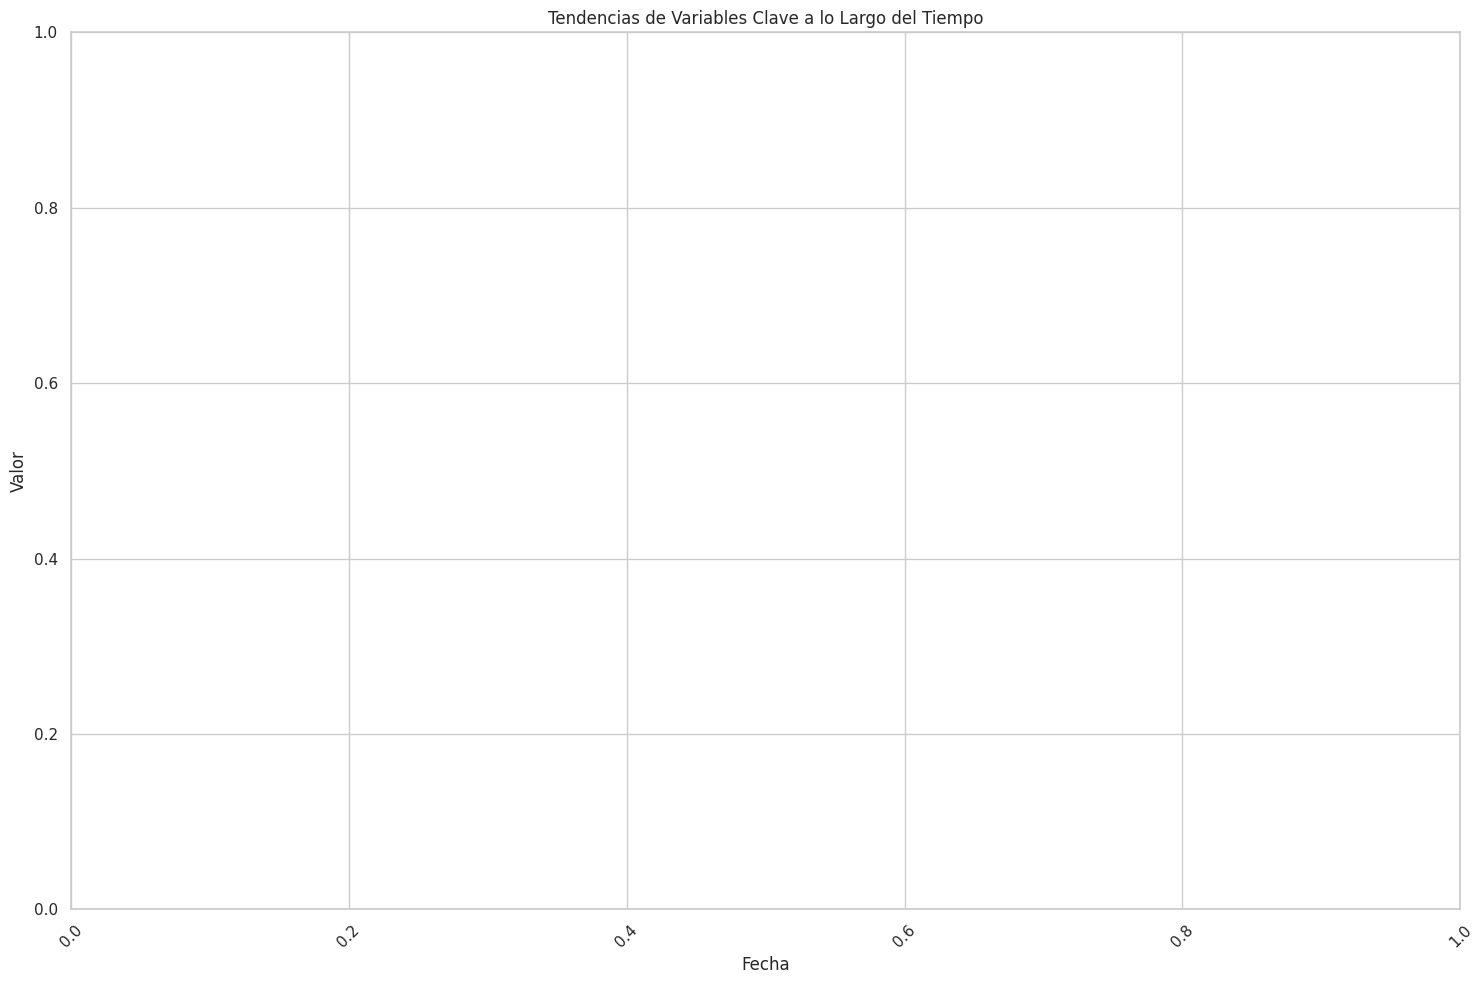

In [13]:
# Visualización de tendencias en las variables principales
try:
    # Identificar variables clave para el análisis
    # Buscaremos variables relacionadas con empleo y desempleo
    key_variables = []
    
    # Verificar si tenemos un DataFrame consolidado limpio
    if 'consolidated_data_clean' in locals():
        df = consolidated_data_clean
        
        # Buscar columnas relacionadas con empleo/desempleo
        employment_keywords = ['empleo', 'desempleo', 'tasa', 'ocupados', 'desocupados', 
                               'inactivos', 'participación', 'laboral', 'trabajo', 'TGP', 'TO', 'TD']
        
        # Buscar columnas que contengan alguna de estas palabras clave
        for col in df.columns:
            col_lower = col.lower()
            if any(keyword.lower() in col_lower for keyword in employment_keywords):
                if df[col].dtype in ['float64', 'int64', 'float32', 'int32']:
                    key_variables.append(col)
        
        print(f"Variables clave identificadas: {key_variables}")
        
        # Si no se encontraron variables clave específicas, usar todas las numéricas
        if not key_variables:
            key_variables = df.select_dtypes(include=['number']).columns.tolist()
            # Excluir columnas de fecha, mes y año
            key_variables = [col for col in key_variables if col not in ['mes', 'año']]
            print(f"Usando todas las variables numéricas: {key_variables}")
        
        # Visualizar tendencias si tenemos una columna de fecha
        if 'fecha' in df.columns:
            # Crear un gráfico para cada variable clave
            plt.figure(figsize=(15, 10))
            for variable in key_variables[:5]:  # Limitar a 5 variables para no saturar el gráfico
                plt.plot(df['fecha'], df[variable], marker='o', label=variable)
            
            plt.title('Tendencias de Variables Clave a lo Largo del Tiempo')
            plt.xlabel('Fecha')
            plt.ylabel('Valor')
            plt.legend()
            plt.grid(True)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
    else:
        print("No se encontró un DataFrame consolidado limpio para visualizar tendencias.")
except Exception as e:
    print(f"Error en la visualización de tendencias: {str(e)}")

In [14]:
# Visualización interactiva con Plotly
try:
    if 'consolidated_data_clean' in locals() and len(key_variables) > 0:
        df = consolidated_data_clean
        
        # Verificar si tenemos la columna fecha
        if 'fecha' in df.columns:
            # Crear una figura interactiva
            fig = go.Figure()
            
            # Añadir una línea para cada variable clave
            for variable in key_variables[:5]:  # Limitar a 5 variables
                fig.add_trace(go.Scatter(
                    x=df['fecha'],
                    y=df[variable],
                    mode='lines+markers',
                    name=variable
                ))
            
            # Personalizar el diseño
            fig.update_layout(
                title='Tendencias de Variables Clave a lo Largo del Tiempo',
                xaxis_title='Fecha',
                yaxis_title='Valor',
                legend_title='Variables',
                hovermode='x unified',
                template='plotly_white'
            )
            
            # Mostrar el gráfico interactivo
            fig.show()
    else:
        print("No hay datos suficientes para crear visualizaciones interactivas.")
except Exception as e:
    print(f"Error en la visualización interactiva: {str(e)}")

No hay datos suficientes para crear visualizaciones interactivas.


## 7. Análisis Estacional

Vamos a analizar si existen patrones estacionales en los datos, comparando los mismos periodos en diferentes años.

In [15]:
# Análisis estacional
try:
    # Verificar si tenemos datos con mes y año
    if 'consolidated_data_clean' in locals():
        df = consolidated_data_clean
        
        if 'mes' in df.columns and 'año' in df.columns:
            # Seleccionar una variable clave para el análisis estacional
            if key_variables:
                seasonal_var = key_variables[0]  # Usar la primera variable clave
                
                # Agrupar por mes y calcular el promedio para cada mes a través de los años
                seasonal_data = df.groupby('mes')[seasonal_var].mean().reset_index()
                
                # Crear un gráfico de barras para ver patrones mensuales
                plt.figure(figsize=(12, 6))
                plt.bar(seasonal_data['mes'], seasonal_data[seasonal_var])
                plt.title(f'Patrón Estacional: Promedio de {seasonal_var} por Mes')
                plt.xlabel('Mes')
                plt.ylabel(seasonal_var)
                plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
                                         'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
                plt.grid(axis='y', linestyle='--', alpha=0.7)
                plt.show()
                
                # Comparar el mismo mes a través de diferentes años
                # Crear una tabla pivote: mes (filas) vs año (columnas)
                if 'año' in df.columns:
                    pivot_table = df.pivot_table(
                        values=seasonal_var,
                        index='mes',
                        columns='año',
                        aggfunc='mean'
                    )
                    
                    print(f"Comparación de {seasonal_var} por mes a través de los años:")
                    display(pivot_table)
                    
                    # Visualizar la comparación con un heatmap
                    plt.figure(figsize=(10, 8))
                    sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu")
                    plt.title(f'Heatmap: {seasonal_var} por Mes y Año')
                    plt.ylabel('Mes')
                    plt.xlabel('Año')
                    plt.show()
            else:
                print("No se identificaron variables clave para el análisis estacional.")
        else:
            print("No se encontraron las columnas 'mes' y 'año' para realizar análisis estacional.")
    else:
        print("No hay datos consolidados disponibles para el análisis estacional.")
except Exception as e:
    print(f"Error en el análisis estacional: {str(e)}")

No se identificaron variables clave para el análisis estacional.


## 8. Correlaciones entre Variables

Vamos a explorar las correlaciones entre las diferentes variables para identificar relaciones significativas.

In [16]:
# Análisis de correlaciones
try:
    if 'consolidated_data_clean' in locals():
        df = consolidated_data_clean
        
        # Seleccionar variables numéricas para la correlación
        numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
        # Excluir columnas no relevantes
        exclude_cols = ['mes', 'año']
        corr_cols = [col for col in numeric_cols if col not in exclude_cols]
        
        if corr_cols:
            # Calcular la matriz de correlación
            corr_matrix = df[corr_cols].corr()
            
            # Visualizar la matriz de correlación con un mapa de calor
            plt.figure(figsize=(12, 10))
            sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
                        vmin=-1, vmax=1, center=0, square=True)
            plt.title('Matriz de Correlación entre Variables')
            plt.tight_layout()
            plt.show()
            
            # Identificar correlaciones fuertes (positivas y negativas)
            # Filtrar correlaciones que no sean 1.0 (correlación consigo misma)
            strong_corr = corr_matrix.unstack()
            strong_corr = strong_corr[abs(strong_corr) < 1.0]  # Excluir correlaciones perfectas
            strong_corr = strong_corr[abs(strong_corr) > 0.7]  # Correlaciones fuertes: > 0.7
            
            if not strong_corr.empty:
                strong_corr = strong_corr.sort_values(ascending=False)
                print("Correlaciones fuertes (|r| > 0.7):")
                display(strong_corr)
            else:
                print("No se encontraron correlaciones fuertes (|r| > 0.7) entre las variables.")
        else:
            print("No hay suficientes columnas numéricas para el análisis de correlación.")
    else:
        print("No hay datos consolidados disponibles para el análisis de correlación.")
except Exception as e:
    print(f"Error en el análisis de correlación: {str(e)}")

No hay suficientes columnas numéricas para el análisis de correlación.


## 9. Análisis por Regiones o Departamentos

Si los datos lo permiten, vamos a comparar los indicadores laborales entre diferentes regiones o departamentos de Colombia.

In [17]:
# Análisis por regiones o departamentos
try:
    if 'consolidated_data_clean' in locals():
        df = consolidated_data_clean
        
        # Buscar columnas que puedan contener información geográfica
        geo_keywords = ['region', 'departamento', 'ciudad', 'municipio', 'zona', 'área']
        geo_columns = []
        
        for col in df.columns:
            col_lower = str(col).lower()
            if any(keyword in col_lower for keyword in geo_keywords):
                geo_columns.append(col)
        
        if geo_columns:
            print(f"Columnas geográficas identificadas: {geo_columns}")
            
            # Seleccionar la primera columna geográfica para el análisis
            geo_col = geo_columns[0]
            
            # Seleccionar una variable clave para comparar entre regiones
            if key_variables:
                var_to_analyze = key_variables[0]
                
                # Calcular estadísticas por región
                regional_stats = df.groupby(geo_col)[var_to_analyze].agg(['mean', 'min', 'max', 'std']).reset_index()
                
                print(f"\nEstadísticas de {var_to_analyze} por {geo_col}:")
                display(regional_stats)
                
                # Visualizar comparación regional
                plt.figure(figsize=(14, 6))
                sns.barplot(x=geo_col, y='mean', data=regional_stats, palette="viridis")
                plt.title(f'{var_to_analyze} Promedio por {geo_col}')
                plt.xlabel(geo_col)
                plt.ylabel(f'Promedio de {var_to_analyze}')
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.show()
                
                # Crear un mapa de calor si tenemos datos temporales y geográficos
                if 'fecha' in df.columns:
                    # Pivot table: regiones vs tiempo
                    pivot_geo = df.pivot_table(
                        values=var_to_analyze, 
                        index=geo_col, 
                        columns='fecha', 
                        aggfunc='mean'
                    )
                    
                    plt.figure(figsize=(15, 8))
                    sns.heatmap(pivot_geo, cmap="YlGnBu", annot=True, fmt=".2f")
                    plt.title(f'Evolución de {var_to_analyze} por {geo_col} a lo Largo del Tiempo')
                    plt.ylabel(geo_col)
                    plt.xlabel('Fecha')
                    plt.tight_layout()
                    plt.show()
            else:
                print("No se identificaron variables clave para el análisis regional.")
        else:
            print("No se identificaron columnas con información geográfica en los datos.")
            
    else:
        print("No hay datos consolidados disponibles para el análisis regional.")
except Exception as e:
    print(f"Error en el análisis por regiones: {str(e)}")

No se identificaron columnas con información geográfica en los datos.


## 10. Visualización Interactiva

Creamos visualizaciones interactivas más detalladas usando Plotly para explorar los datos de forma dinámica.

In [18]:
# Visualizaciones interactivas con Plotly
try:
    if 'consolidated_data_clean' in locals():
        df = consolidated_data_clean
        
        # Verificar si tenemos datos temporales
        if 'fecha' in df.columns and key_variables:
            # 1. Gráfico de líneas interactivo para variables clave a lo largo del tiempo
            fig = px.line(
                df, 
                x='fecha', 
                y=key_variables[:3],  # Usar las primeras 3 variables clave
                title='Evolución Temporal de Indicadores Clave',
                labels={'fecha': 'Fecha', 'value': 'Valor'},
                line_shape='spline',  # Curvas suavizadas
                render_mode='svg'
            )
            fig.update_layout(
                hovermode='x unified',
                legend_title='Variable',
                template='plotly_white'
            )
            fig.show()
            
            # 2. Dashboard interactivo con múltiples gráficos
            if len(key_variables) >= 3:
                # Crear un dashboard con 3 subplots
                fig = make_subplots(
                    rows=2, 
                    cols=2,
                    subplot_titles=(
                        f'Evolución de {key_variables[0]}',
                        f'Evolución de {key_variables[1]}',
                        f'Relación entre {key_variables[0]} y {key_variables[1]}'
                    ),
                    specs=[
                        [{"type": "scatter"}, {"type": "scatter"}],
                        [{"type": "scatter", "colspan": 2}, None]
                    ]
                )
                
                # Añadir gráficos de línea para cada variable
                fig.add_trace(
                    go.Scatter(x=df['fecha'], y=df[key_variables[0]], 
                              name=key_variables[0], mode='lines+markers'),
                    row=1, col=1
                )
                
                fig.add_trace(
                    go.Scatter(x=df['fecha'], y=df[key_variables[1]], 
                              name=key_variables[1], mode='lines+markers'),
                    row=1, col=2
                )
                
                # Añadir gráfico de dispersión para ver la relación entre dos variables
                fig.add_trace(
                    go.Scatter(x=df[key_variables[0]], y=df[key_variables[1]], 
                              mode='markers', name='Correlación',
                              marker=dict(
                                  size=10,
                                  color=df['fecha'],  # Colorear por fecha
                                  colorscale='Viridis',
                                  showscale=True
                              )),
                    row=2, col=1
                )
                
                fig.update_layout(
                    height=800, 
                    title_text='Dashboard de Indicadores Laborales',
                    template='plotly_white',
                    showlegend=False
                )
                fig.show()
                
                # 3. Gráfico de área apilada para mostrar la composición de la población laboral
                # Buscar variables que puedan representar población
                population_keywords = ['población', 'ocupados', 'desocupados', 'inactivos', 'PEA', 'PEI']
                population_vars = []
                
                for col in df.columns:
                    col_lower = str(col).lower()
                    if any(keyword.lower() in col_lower for keyword in population_keywords):
                        if df[col].dtype in ['float64', 'int64', 'float32', 'int32']:
                            population_vars.append(col)
                
                if population_vars:
                    fig = px.area(
                        df, 
                        x='fecha', 
                        y=population_vars[:4],  # Usar hasta 4 variables
                        title='Composición de la Población Laboral a lo Largo del Tiempo',
                        labels={'fecha': 'Fecha', 'value': 'Población'},
                        template='plotly_white'
                    )
                    fig.update_layout(hovermode='x unified')
                    fig.show()
        else:
            print("No hay suficientes datos temporales o variables clave para crear visualizaciones interactivas.")
    else:
        print("No hay datos consolidados disponibles para las visualizaciones interactivas.")
except Exception as e:
    print(f"Error en la creación de visualizaciones interactivas: {str(e)}")

No hay suficientes datos temporales o variables clave para crear visualizaciones interactivas.


## Conclusiones

Debemos, este análisis exploratorio, examinar los datos de empleo y desempleo del DANE para Colombia durante el período 2022-2025. Identificado patrones temporales, tendencias estacionales, correlaciones entre variables y diferencias regionales en los indicadores laborales.

Este análisis debería proporcionar una base para investigaciones más detalladas sobre el mercado laboral colombiano, particularmente en lo relacionado con el empleo en sectores STEM y la participación femenina en dichos sectores.

Debido a lo que se ve, tocará reestructurar la base de datos, tienen muchas hojas y estructuras no amigables para analizarlas aquí.